# Part 3

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
sentiment = ['negative', 'positive']
# use read_csv to read the 3 txt files, then concatenate with a new column 'source', which indicates the source of the data.
def data_init(path):
    data = pd.DataFrame()
    source = path.split('/')[2].split('_')[0]
    if source == 'imdb':
        data = pd.read_csv(path, sep='  \t', engine='python', header=None)
    else:
        data = pd.read_csv(path, sep='\t', header=None)
    data.columns = ['sentence', 'score']
    for i, j in data.score.items():
        data.loc[i, 'sentiment'] = sentiment[j]
    print(source)
    data['source'] = source
    return(data)

## Another text visualization

In [3]:
def visualize_data(data):
    text = ' '.join(data.sentence)
    print(text)
    print(type(text))
    img = WordCloud(background_color='pink').generate_from_text(text)
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.show()

amazon
imdb
yelp
So there is no way for me to plug it in here in the US unless I go by a converter. Good case, Excellent value. Great for the jawbone. Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!! The mic is great. I have to jiggle the plug to get it to line up right to get decent volume. If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one. If you are Razr owner...you must have this! Needless to say, I wasted my money. What a waste of money and time!. And the sound quality is great. He was very impressed when going from the original battery to the extended battery. If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset. Very good quality though The design is very odd, as the ear "clip" is not very comfortable at all. Highly recommend for any one who has a blue tooth phone. I advise EVERYONE DO NOT BE FOOLED! So Far So Good!. Works great

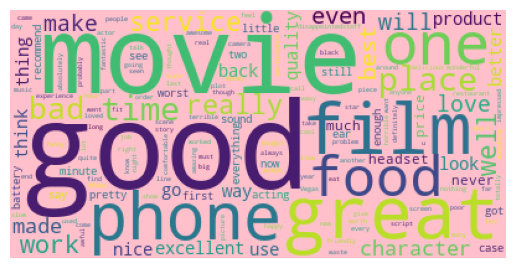

In [4]:
data_a = data_init('../sentiment_labelled_sentences/amazon_cells_labelled.txt')
data_i = data_init('../sentiment_labelled_sentences/imdb_labelled.txt')
data_y = data_init('../sentiment_labelled_sentences/yelp_labelled.txt')
data = pd.concat([data_a, data_i, data_y], axis=0)
data = data.reset_index(drop=True)
# print(data)
visualize_data(data)

## TF-IDF Features

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
Vect = TfidfVectorizer()
fit = Vect.fit_transform(data.sentence)
print(Vect.get_feature_names_out())
print(fit.toarray())
print(pd.DataFrame(fit.toarray(), columns=Vect.get_feature_names_out()))

['00' '10' '100' ... 'zillion' 'zombie' 'zombiez']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
       00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
2995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2998  0.0  0.

## Naive Bayes classifier

## For Term Frequency

(1800,) (1200,) (1800,) (1200,)
0.8208333333333333


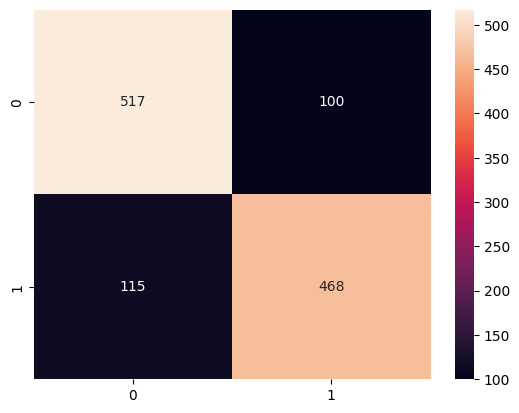

In [6]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
X = data.sentence
Y = data.score
# Split the data into training and testing sets, X is input, Y is output
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
# Set up the Term Frequency Vectorizer
cv_tf = CountVectorizer()
tf_x_train = cv_tf.fit_transform(X_train)
tf_x_test = cv_tf.transform(X_test)
# print(tf_x_train)
# Set up the Naive Bayes Classifier(MultiNominal)
model_tf = MultinomialNB()
# Fitting the model then making predictions
model_tf.fit(tf_x_train, Y_train)
pred = model_tf.predict(tf_x_test)
esti = metrics.accuracy_score(Y_test, pred)
print(esti)
# Making a confusion matrix then use seaborn heatmap to visusalize it(sklearn DisplayConfusionMatrix is too ugly for me to use.)
cm = confusion_matrix(Y_test, pred)
display = sns.heatmap(cm, annot=True, fmt='d')
display.plot()
plt.show(display)

## For TF-IDF

(2100,) (900,) (2100,) (900,)
0.8311111111111111


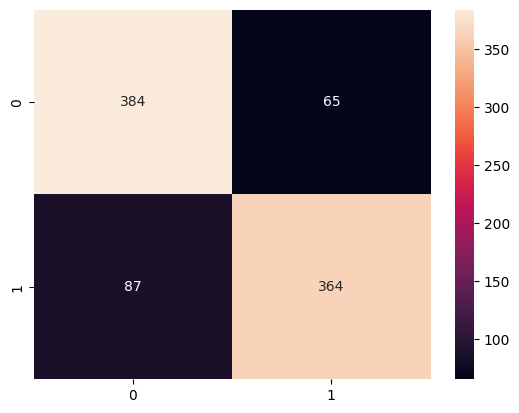

In [7]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
X = data.sentence
Y = data.score
# Split the data into training and testing sets, X is input, Y is output
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
# Set up the TF-IDF Vectorizer
tv_tdidf = TfidfVectorizer()
tfidf_x_train = tv_tdidf.fit_transform(X_train)
tfidf_x_test = tv_tdidf.transform(X_test)
# print(tf_x_train)
# Set up the Naive Bayes Classifier(MultiNominal)
model_tfidf = MultinomialNB()
# Fitting the model then making predictions
model_tfidf.fit(tfidf_x_train, Y_train)
pred = model_tfidf.predict(tfidf_x_test)
esti = metrics.accuracy_score(Y_test, pred)
print(esti)
# Making a confusion matrix then use seaborn heatmap to visusalize it(sklearn DisplayConfusionMatrix is too ugly for me to use.)
cm = confusion_matrix(Y_test, pred)
display = sns.heatmap(cm, annot=True, fmt='d')
display.plot()
plt.show(display)

# Part 4
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

1. term_frequency is computationally intensive
2. category_name is useless in classification, we only need to know the category number to do this
3. Vocabularies in dataset are too divergent, which leads to a very large and sparse 2d array, displaying with heatmap also is meaningless. 

In [22]:
# For the first
from sklearn.feature_extraction.text import CountVectorizer
import time
time_start = time.time()
count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.sentence)
term_frequencies = []
print(data_counts.shape[1])
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))
time_end = time.time()
print('latency for generating term_frequency: ', time_end-time_start)
print(term_frequencies)


5155
latency for generating term_frequency:  7.598983287811279
[array([1], dtype=int64), array([38], dtype=int64), array([3], dtype=int64), array([2], dtype=int64), array([4], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([2], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([9], dtype=int64), array([1], dtype=int64), array([2], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([2], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([2], dtype=int64), array([1], dtype=int64), array([7], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([3],

In [23]:
import numpy as np
count_vect = CountVectorizer()
time_start = time.time()
data_counts = count_vect.fit_transform(data.sentence)
term_frequencies2 = []
print(data_counts.shape[1])
term_frequencies2 = np.sum(data_counts, axis=0)
term_frequencies2 = term_frequencies2.tolist()[0]
time_end = time.time()
print('latency for generating term_frequency2: ', time_end-time_start)
print(term_frequencies2)
print('The process result is the same? ', term_frequencies == term_frequencies2)

5155
latency for generating term_frequency2:  0.02641153335571289
[1, 38, 3, 2, 4, 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 7, 1, 1, 3, 1, 1, 1, 5, 1, 1, 1, 2, 1, 1, 4, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 5, 4, 1, 85, 7, 1, 1, 1, 21, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 3, 43, 7, 1, 1, 1, 1, 10, 19, 3, 3, 1, 16, 1, 1, 2, 1, 1, 2, 3, 4, 2, 1, 1, 1, 1, 1, 6, 1, 1, 2, 4, 3, 1, 1, 1, 1, 2, 2, 52, 2, 49, 2, 4, 1, 1, 1, 9, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 150, 1, 1, 1, 2, 2, 2, 1, 14, 3, 5, 1, 1, 4, 74, 8, 1, 24, 35, 1, 1, 3, 34, 1, 9, 7, 3, 2, 2, 2, 2, 8, 1, 2, 1, 106, 1, 1138, 1, 3, 1, 3, 1, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 3, 1, 7, 22, 2, 1, 1, 1, 1, 1, 1, 53, 1, 23, 15, 5, 4, 1, 1, 3, 1, 1, 1, 1, 3, 2, 4, 4, 3, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 180, 10, 5, 1, 1, 1, 1, 1, 1, 1, 21, 2, 1, 8, 1, 1, 13, 1, 1, 1, 2, 1, 1, 1, 175, 1, 2, 8